# Logistic Regression for binary clasification

Laura Choque

Churn prediction is a binary classification problem. Logistic Regression is a probabilistic classifier that models the likelihood of class membership using the sigmoid function.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/churn_prediction_data/churn-bigml-20.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/churn_prediction_data/churn-bigml-80.csv")
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


Why this dataset fits Logistic Regression

Binary target variable (Churn)

Mix of numerical and categorical features

Business-relevant interpretability

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

Key components of the task

One-hot encoding of categorical variables

In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True)
test_df  = pd.get_dummies(test_df, drop_first=True)

train_df, test_df = train_df.align(test_df, axis=1, fill_value=0)

In [ ]:
target_col = "Churn"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

Feature scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
#training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#classes
y_pred = model.predict(X_test_scaled)

In [ ]:
#probabilidades
y_prob = model.predict_proba(X_test_scaled)[:, 1]





Evaluation using:

Accuracy

Precision, Recall, F1-score

ROC Curve and AUC

Important visualizations

In [ ]:
#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8510877719429858


In [ ]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[2172  106]
 [ 291   97]]


In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.95      0.92      2278
        True       0.48      0.25      0.33       388

    accuracy                           0.85      2666
   macro avg       0.68      0.60      0.62      2666
weighted avg       0.82      0.85      0.83      2666



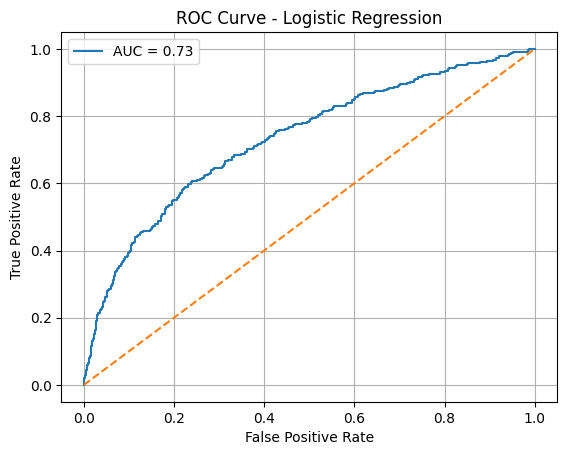

In [ ]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

There is a 73% probability that the model assigns a higher churn probability to a randomly chosen churned customer than to a randomly chosen non-churned customer.

In [ ]:
#coeficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
})

coef_df["Odds_Ratio"] = np.exp(coef_df["Coefficient"])
coef_df.sort_values("Odds_Ratio", ascending=False)

,Feature,Coefficient,Odds_Ratio
15,Customer service calls,0.846106,2.330553
66,International plan_Yes,0.543487,1.722001
5,Total day charge,0.401720,1.494392
3,Total day minutes,0.401114,1.493487
8,Total eve charge,0.398734,1.489938
...,...,...,...
27,State_IA,-0.325065,0.722480
50,State_OH,-0.329534,0.719259
57,State_TN,-0.350573,0.704284
25,State_GA,-0.418592,0.657973
